## Periodoc magnetic field - infinite graphene - 1D

testing the paper models "Graphene-based active slow surface plasmon polaritons"

In [1]:
%reload_ext autoreload
%autoreload

import Electromagnetics.graphene_sym as grsym

graph_mp_sym = grsym.InfPdicFrStGrapheneMP_Sym(vb=True)



Boundary condition:


Fourier Variables:  [\tilde{E_{x1}}, \tilde{E_{y1}}, \tilde{E_{z1}}, \tilde{\sigma_d}, \tilde{\sigma_o}]


setting y=0


applying convolutions


alpha-k relation:


alpha-k relation:


alpha-k relation:


getting normal component


applying convolutions and orthogonalities


In [335]:
%reload_ext autoreload
%autoreload


import Electromagnetics.graphene as gr
from scipy import constants
import math
import cmath
import numpy as np


def getGrapheneParameters_paper(Vb, mu, d):
    t = 100*constants.nano
    p = 40*constants.nano
    eps_c = 1.0
    eps_d = 3.9
    ns_t = eps_d*constants.epsilon_0*Vb/(constants.e*t)
    ns_d = eps_d*constants.epsilon_0*Vb/(constants.e*(d+t))
    v_F = 1.0e6
    mu_c_t = constants.hbar*v_F*math.sqrt(math.pi*ns_t)
    mu_c_d = constants.hbar*v_F*math.sqrt(math.pi*ns_d)
    tau_t = gr.mobilityToScatteringTime(mu, mu_c_t)
    tau_d = gr.mobilityToScatteringTime(mu, mu_c_d)
    eps = (eps_c + eps_d)/2.0
    B = 0.0
    T = 300
    return [mu_c_t, mu_c_d, B, T, tau_t, tau_d, p, eps]
    
Vb, mu, d = 60.0, 20000.0, 100.0*constants.nano
mu_c0, mu_c1, B_0, T, tau0, tau1, Z_period, eps = getGrapheneParameters_paper(Vb, mu, d)
B_1 = B_0
print(' mu_c0: ', mu_c0/constants.e, '\n mu_c1: ', mu_c1/constants.e, '\n B_0: ', B_0, '\n T: ', T, '\n tau0: ', tau0, '\n tau1: ', tau1, 
      '\n p: ', Z_period, '\n eps: ', eps)


N=32
graph_mp = gr.InfPdicFrStGrapheneMP(N=N, vb=True, eps_r=eps, handle_overflow=True)
frequency = 45.0*constants.tera
graph_mp.freq = frequency
#Z_period = 0.01*constants.milli
graph_mp.Z_period = Z_period

graph_mp.set_f_step_mu_c_tau(mu_c0, mu_c1, tau0, tau1, T, B_0, dz_0=Z_period/2.0, dz_1=Z_period/2.0)

graph_mp.getCondFCs()
graph_mp.getMatrices(graph_mp_sym)


omega = np.array([2.0*math.pi*frequency])
kz_k_0_inf = gr.magnetoplasmonDispersion_normalized((mu_c0+mu_c1)/2.0, (B_0+B_1)/2.0, omega, (tau0+tau1)/2.0, T)
print('infinite graphene dispersion: \n', kz_k_0_inf)
k_0 = 2.0*math.pi*frequency*math.sqrt(constants.mu_0*constants.epsilon_0)
k_inf = kz_k_0_inf[0][0]*k_0
alpha_inf = cmath.sqrt(k_inf**2 - k_0**2)

print('Z_period/lambda_inf = ', Z_period/(2.0*math.pi/k_inf.real))

k_init = 0.45*2.0*math.pi/Z_period
alpha_init = cmath.sqrt(k_init**2 - k_0**2)
#k_init = k_inf*2.0
#alpha_init = cmath.sqrt(k_init**2 - k_0**2)*2.01
print('k_init/k_0: ', k_init/k_0, 'alpha_init/ k_0: ', alpha_init/k_0)
print('k_init/k_inf: ', k_init/k_inf, 'alpha_init/ alpha_inf: ', alpha_init/alpha_inf)
eigvar_vals_0 = [k_init, alpha_init]

n_roots = 1
graph_mp.solver = 'lm'
res = graph_mp.solveDeterminant(graph_mp_sym, eigvar_vals_0, n_roots=n_roots)

print('all roots: \n', res)

print('k*p/(2*pi) : ', res[0][0][0]*Z_period/(2.0*math.pi))
print('lambda/Z_period : ', (2.0*math.pi)/res[0][0][0]/Z_period)


 mu_c0:  0.41953460647374163 
 mu_c1:  0.29665576518001235 
 B_0:  0.0 
 T:  300 
 tau0:  8.390692129474832e-09 
 tau1:  5.933115303600247e-09 
 p:  4e-08 
 eps:  2.45
sigma_d_tilde_vec: 
 [ -1.61704167e-12 -8.62870614e-07j   4.23901150e-08 -7.94401632e-14j
  -1.61704167e-12 -8.62870614e-07j   1.27994765e-07 -2.39865474e-13j
  -1.61704167e-12 -8.62870614e-07j   2.16137837e-07 -4.05047853e-13j
  -1.61704167e-12 -8.62870614e-07j   3.08740042e-07 -5.78586761e-13j
  -1.61704167e-12 -8.62870614e-07j   4.08107406e-07 -7.64803753e-13j
  -1.61704167e-12 -8.62870614e-07j   5.17184743e-07 -9.69217478e-13j
  -1.61704167e-12 -8.62870614e-07j   6.39948462e-07 -1.19927984e-12j
  -1.61704167e-12 -8.62870614e-07j   7.82060338e-07 -1.46560114e-12j
  -1.61704167e-12 -8.62870614e-07j   9.52031013e-07 -1.78413055e-12j
  -1.61704167e-12 -8.62870614e-07j   1.16344634e-06 -2.18032830e-12j
  -1.61704167e-12 -8.62870614e-07j   1.43961265e-06 -2.69787104e-12j
  -1.61704167e-12 -8.62870614e-07j   1.82438663e-06 

/home/nima/ipython workspace/Electromagnetics/FourierBloch.py:818: OptimizeWarning: Unknown solver options: maxfev
  sol = optimize.root(f, x_0, method=solver, tol=tol,


### using the graphene.py package for calculating magnetoplasmon dispersions

In [346]:
%reload_ext autoreload
%autoreload

import Electromagnetics.graphene_sym as grsym
import math

graph_mp_sym = grsym.InfPdicFrStGrapheneMP_Sym(vb=False)


import Electromagnetics.graphene as gr
from scipy import constants

N=32
graph_mp = gr.InfPdicFrStGrapheneMP(N=N, vb=False)
frequency = 2.0*constants.tera
Z_period = 0.01*constants.milli
graph_mp.freq = frequency
graph_mp.Z_period = Z_period

mu_c0 = 0.2*constants.eV
mu_c1 = 0.3*constants.eV
B_0 = 1.0
B_1 = 1.0
tau0 = 0.2*constants.pico
tau1 = tau0
T = 100.0


import math
import cmath
import numpy as np

#graph_mp.set_f_step_B(mu_c0, tau, T, B_0, B_1, dz_0=Z_period/2.0, dz_1=Z_period/2.0)
graph_mp.set_f_step_mu_c(mu_c0, mu_c1, tau0, T, B_0, dz_0=Z_period/2.0, dz_1=Z_period/2.0)
#def fun_z(z):
#    return 2.0*math.pi*np.sin(2.0*math.pi*z)
#graph_mp.set_f_general_B(mu_c0, tau, T, B_0, dz=Z_period, fun=fun_z)

graph_mp.getCondFCs()
graph_mp.getMatrices(graph_mp_sym)


omega = np.array([2.0*math.pi*frequency])
kz_k_0_inf = gr.magnetoplasmonDispersion_normalized((mu_c0+mu_c1)/2.0, (B_0+B_1)/2.0, omega, (tau0+tau1)/2.0, T)
print('infinite graphene dispersion: \n', kz_k_0_inf)
k_0 = 2.0*math.pi*frequency*math.sqrt(constants.mu_0*constants.epsilon_0)
k_inf = kz_k_0_inf[0][0]*k_0
alpha_inf = cmath.sqrt(k_inf**2 - k_0**2)

print('Z_period/lambda_inf = ', Z_period/(2.0*math.pi/k_inf.real))

#k_init = (305418.95599134162+47.954582634655338j)
#alpha_init = (298066.69894455484-51.949839210199983j)*1.01 
k_init = 0.49*2.0*math.pi/Z_period   #k_inf*10.0
alpha_init = cmath.sqrt(k_init**2 - k_0**2)*1.01
print('k_init/k_inf: ', k_init/k_inf, 'alpha_init/ alpha_inf: ', alpha_init/alpha_inf)
eigvar_vals_0 = [k_init, alpha_init]

n_roots = 8
graph_mp.solver = 'hybr'
res = graph_mp.solveDeterminant(graph_mp_sym, eigvar_vals_0, n_roots=n_roots)

#print('all roots: \n', res)

if res[0]!=False:
    for i in range(len(res)):
        print('k/k_0 : ', res[i][0][0]/k_0)
        print('alpha/k_0 : ', res[i][0][1]/k_0)
        print('k*p/(2*pi) : ', res[i][0][0]*Z_period/(2.0*math.pi))
        print('lambda/Z_period : ', (2.0*math.pi)/res[i][0][0]/Z_period)
        print('-'*10)
else:
    print("No Roots!")

infinite graphene dispersion: 
 [array([ 2.27917808-0.87078793j]), array([ 1.06266527+0.06775531j])]
Z_period/lambda_inf =  0.152050395043
k_init/k_inf:  (2.81212539982+1.0744069898j) alpha_init/ alpha_inf:  (2.9172868880847167+1.3330645359684525j)
k/k_0 :  (7.43327540217-0.0454521697663j)
alpha/k_0 :  (7.36570575582-0.0458691273756j)
k*p/(2*pi) :  (0.495894756777-0.00303224237658j)
lambda/Z_period :  (2.01648151812+0.0123301580169j)
----------
k/k_0 :  (22.3979941277-0.04662766808j)
alpha/k_0 :  (22.3756596614-0.0466742099069j)
k*p/(2*pi) :  (1.49423332909-0.00311066318286j)
lambda/Z_period :  (0.669236622386+0.0013932025751j)
----------
k/k_0 :  (-7.62565387235-0.0486752590792j)
alpha/k_0 :  (-7.55980412683-0.0490992453849j)
k*p/(2*pi) :  (-0.508728866845-0.00324726375066j)
lambda/Z_period :  (-1.96560353255+0.0125466304655j)
----------
k/k_0 :  (37.3829001377-0.0468863612222j)
alpha/k_0 :  (37.369522666-0.0469031455141j)
k*p/(2*pi) :  (2.49391865206-0.00312792133164j)
lambda/Z_perio

Populating the interactive namespace from numpy and matplotlib
z_axis.shape (64,)


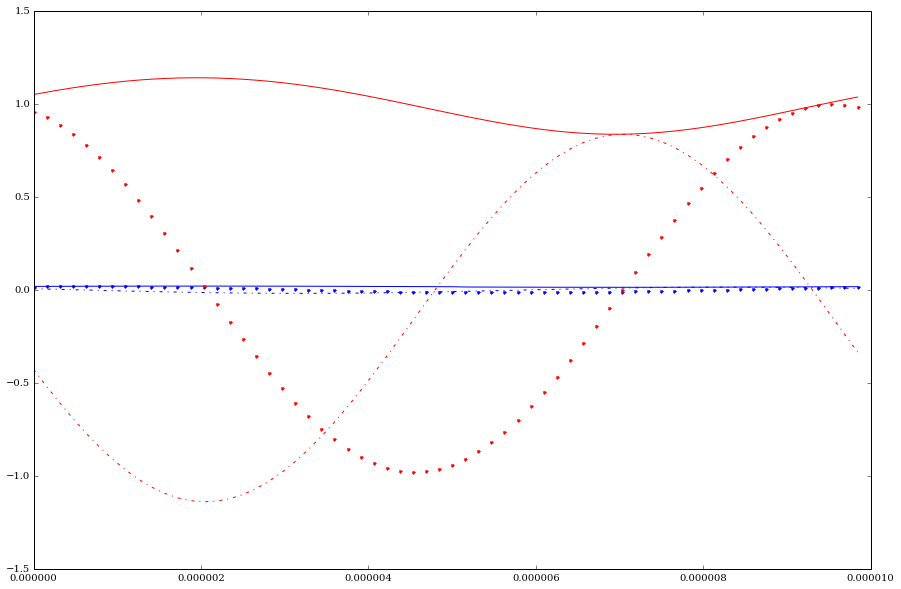

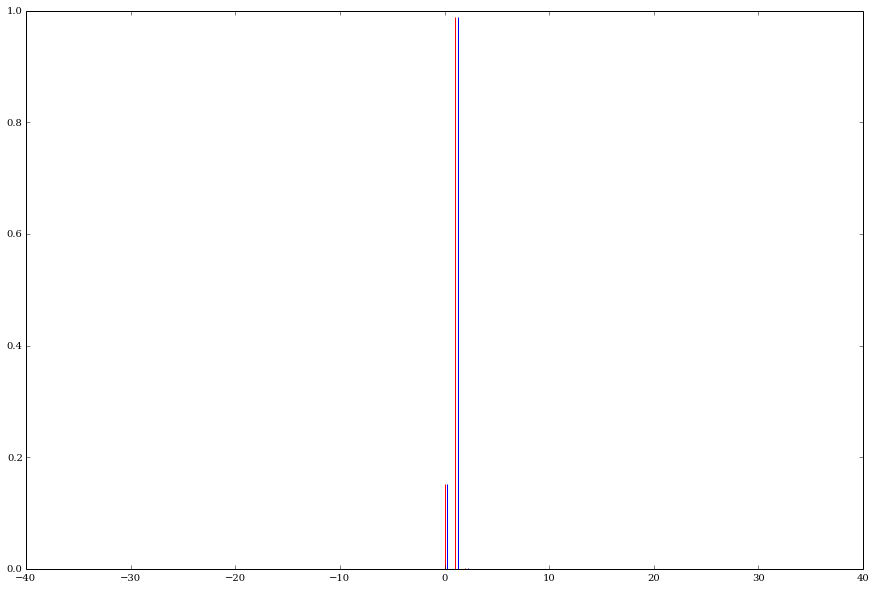

In [347]:
%reload_ext autoreload
%autoreload

%pylab inline
import matplotlib

from Electromagnetics.FourierBloch import *


figsize(15, 10)
N_p = 2*graph_mp.N

ind_eig = 0

Ex_field, Ez_field, z_axis = graph_mp.GetFieldsT_Exz(res[ind_eig][1])

print('z_axis.shape', z_axis.shape)
plot(z_axis, np.abs(Ex_field), 'b', z_axis, np.abs(Ez_field), 'r')
plot(z_axis, np.real(Ex_field), 'b-.', z_axis, np.real(Ez_field), 'r-.')
plot(z_axis, np.imag(Ex_field), 'b.', z_axis, np.imag(Ez_field), 'r.')
show()

Ex_field_inv, Ez_field_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Exz(res[ind_eig][1])
vlines(z_axis, np.zeros(z_axis.shape), np.abs(Ez_field_inv), colors=u'r', linestyles=u'solid', label=u'')

graph_mp_sym.vbose = False
k = res[ind_eig][0][0]
alpha = res[ind_eig][0][1]
x_null = res[ind_eig][1]
E1_coeffs, E2_coeffs = graph_mp.GetFieldHarmonics_Exyz(graph_mp_sym, frequency, k, alpha, x_null)
vlines(z_axis+0.25, np.zeros(z_axis.shape), np.abs(E1_coeffs[2,:]), colors=u'b', linestyles=u'solid', label=u'')
show()

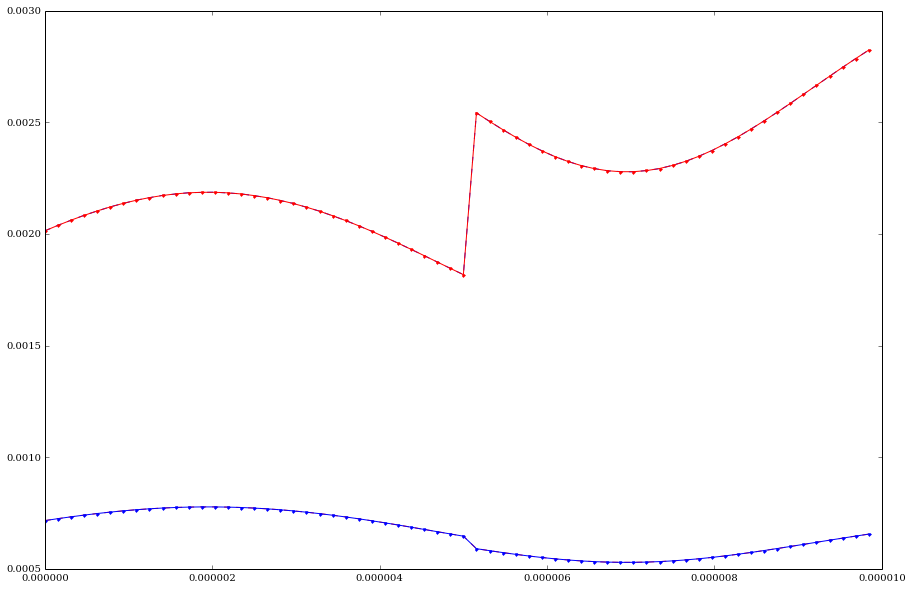

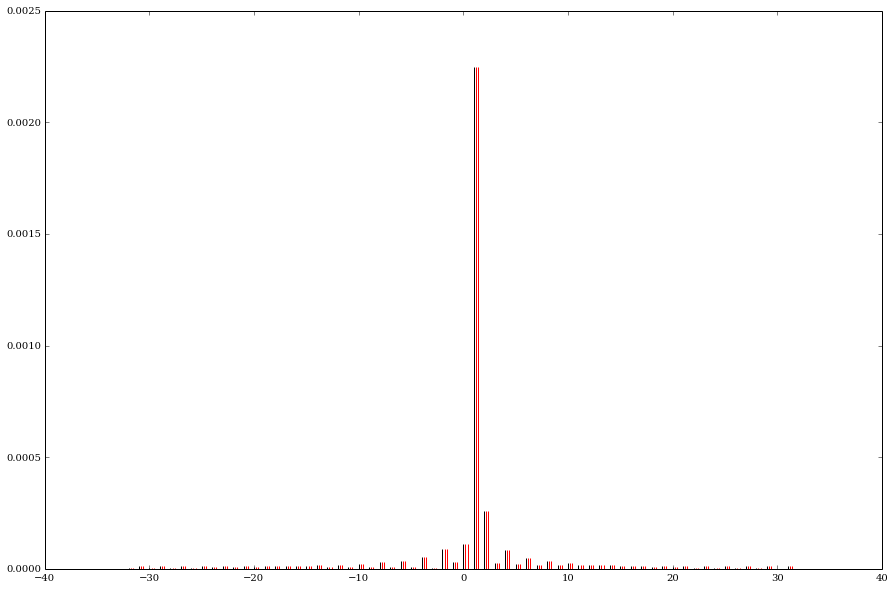

In [348]:
%reload_ext autoreload
%autoreload

mode = 'np.abs'

k = res[ind_eig][0][0]
alpha = res[ind_eig][0][1]
x_null = res[ind_eig][1]

graph_mp_sym.vbose = False
Hx1_field, Hz1_field, Hx2_field, Hz2_field, z_axis = graph_mp.GetFieldsT_Hxz(graph_mp_sym, frequency, k, alpha, x_null)

figsize(15, 10)
plot(z_axis, eval(mode)(Hx1_field-Hx2_field), 'b--', z_axis, eval(mode)(Hz1_field-Hz2_field), 'r--')

[Jx, Jz, z_axis] = graph_mp.GetCurrentT_Jxz(frequency, x_null)
plot(z_axis, eval(mode)(Jx), 'b', z_axis, eval(mode)(Jz), 'r')

[Jx, Jz, z_axis] = graph_mp.GetCurrentT_Jxz_Conv(graph_mp_sym, frequency, x_null)
plot(z_axis, eval(mode)(Jx), 'b.', z_axis, eval(mode)(Jz), 'r.')

show()

mode = 'np.abs'
jcomp = 'z'
Hx1_inv, Hz1_inv, Hx2_inv, Hz2_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Hxz(graph_mp_sym, frequency, k, alpha, x_null)
figsize(15, 10)

if jcomp=='z':
    vlines(z_axis, np.zeros(z_axis.shape), eval(mode)(Hx1_inv-Hx2_inv), colors=u'k', linestyles=u'solid', label=u'')
    
    Jx_inv, Jz_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Jxz( frequency, x_null)
    
    vlines(z_axis+0.2, np.zeros(z_axis.shape), eval(mode)(Jz_inv), colors=u'r', linestyles=u'solid', label=u'')
    
    J_xyz_inv = graph_mp.GetCurrentHarmonics_Jxyz(graph_mp_sym, frequency, x_null)
    vlines(z_axis+0.4, np.zeros(z_axis.shape), eval(mode)(J_xyz_inv[2,:]), colors=u'r', linestyles=u'solid', label=u'')
else:
    assert jcomp=='x'
    vlines(z_axis, np.zeros(z_axis.shape), eval(mode)(Hz1_inv-Hz2_inv), colors=u'k', linestyles=u'solid', label=u'')
    
    Jx_inv, Jz_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Jxz( frequency, x_null)
    
    vlines(z_axis+0.2, np.zeros(z_axis.shape), eval(mode)(Jx_inv), colors=u'r', linestyles=u'solid', label=u'')
    
    J_xyz_inv = graph_mp.GetCurrentHarmonics_Jxyz(graph_mp_sym, frequency, x_null)
    vlines(z_axis+0.4, np.zeros(z_axis.shape), eval(mode)(J_xyz_inv[0,:]), colors=u'r', linestyles=u'solid', label=u'')

show()


In [349]:
%reload_ext autoreload
%autoreload

eigvar_vals_0, x_null_0 = res[ind_eig]
graph_mp.solver = 'lm'

f_start = frequency
f_end = 8.0*constants.tera
f_step = (f_end-f_start)/40.0

graph_mp_sym.vbose = False
graph_mp.vbose = False
freq_sweep, x_null_sweep = graph_mp.sweepFrequency(graph_mp_sym, eigvar_vals_0, x_null_0, f_start
                                                                      ,f_end, f_step, record_data=True)

freq_sweep.printXY()


frequency :  2037500000000.0    k_z/k_0:  7.29723316727   lambda_z/z_period:  2.01634509035
frequency :  2112500000000.0    k_z/k_0:  7.03981095361   lambda_z/z_period:  2.01587216647
frequency :  2262500000000.0    k_z/k_0:  6.57674913435   lambda_z/z_period:  2.01474848904
frequency :  2412500000000.0    k_z/k_0:  6.17191343325   lambda_z/z_period:  2.01341618249
frequency :  2562500000000.0    k_z/k_0:  5.81501062098   lambda_z/z_period:  2.01189965689
frequency :  2712500000000.0    k_z/k_0:  5.4980459506   lambda_z/z_period:  2.01021537751
frequency :  2862500000000.0    k_z/k_0:  5.2147121086   lambda_z/z_period:  2.008375295
frequency :  3012500000000.0    k_z/k_0:  4.95995576931   lambda_z/z_period:  2.00639225951
frequency :  3162500000000.0    k_z/k_0:  4.72964862703   lambda_z/z_period:  2.00429337622
frequency :  3312500000000.0    k_z/k_0:  4.5203009472   lambda_z/z_period:  2.00215394073
frequency :  3462500000000.0    k_z/k_0:  4.32882523107   lambda_z/z_period:  2.00014

Populating the interactive namespace from numpy and matplotlib
freq_sweep.getLastX(): 
 7962500000000.0
lambda_z / z_period : 
 [ 2.01655691  2.01634509  2.01587217  2.01474849  2.01341618  2.01189966
  2.01021538  2.00837529  2.00639226  2.00429338  2.00215394  2.00014218
  1.9983831   1.99657278  1.99551911  1.99310975  1.99245958  1.99179522
  1.99043113  1.98902866  1.98759484  1.98613396  1.98464856  1.98314012
  1.9816095   1.98005721  1.97848352  1.97688859  1.97527251  1.97363534
  1.9719771   1.97029785  1.9685976   1.96687641  1.96513432  1.96337139
  1.96158768  1.95978325  1.95795819  1.95611258  1.9542465   1.95236006
  1.95045335  1.94852647  1.94657953  1.94461265  1.94262593  1.9406195
  1.93859347  1.93654797  1.93448313  1.93239906  1.9302959   1.92817378
  1.92603283  1.92387319  1.92169499  1.91949836  1.91728346  1.91505041
  1.91279936  1.91053044  1.9082438   1.90593959  1.90361795  1.90127902
  1.89892295  1.89654988  1.89415997  1.89175336]
V_g/c = 
 [ 24.01115

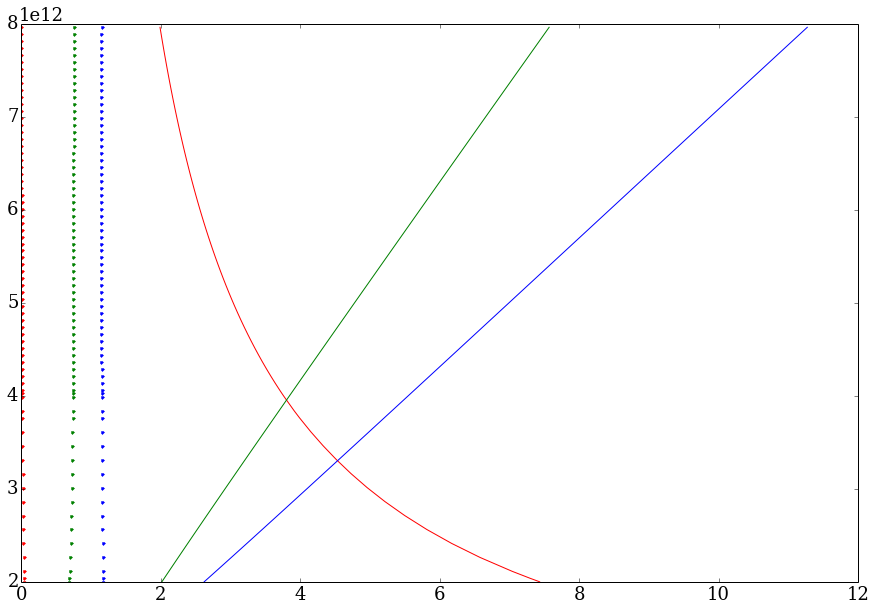

In [350]:
%pylab inline
import matplotlib

print('freq_sweep.getLastX(): \n', freq_sweep.getLastX())
X, Y = freq_sweep.getXY()
X = np.array(X)
K_0 = X*2.0*math.pi*math.sqrt(constants.mu_0*constants.epsilon_0)
Y_0 = np.array([Y[i][0] for i in range(len(Y))])
Y_1 = np.array([Y[i][1] for i in range(len(Y))])
v_g = np.array([2.0*math.pi*(X[i]-X[i-1])/(Y[i][0].real-Y[i-1][0].real)/constants.c for i in range(1,len(Y))])

kz_k_0_inf__0, _ = gr.magnetoplasmonDispersion_normalized(mu_c0, B_0, 2.0*math.pi*X, tau0, T)
kz_k_0_inf__1, _ = gr.magnetoplasmonDispersion_normalized(mu_c1, B_1, 2.0*math.pi*X, tau1, T)


print('lambda_z / z_period : \n', 2.0*math.pi/np.real(Y_0)/Z_period)

figsize(15, 10)

plot(np.real(Y_0)/K_0, X, 'r', -np.imag(Y_0)/K_0, X, 'r.')
plot(np.real(kz_k_0_inf__0), X, 'b', -np.imag(kz_k_0_inf__0), X, 'b.')
plot(np.real(kz_k_0_inf__1), X, 'g', -np.imag(kz_k_0_inf__1), X, 'g.')

#plot(np.real(Y_0)*Z_period/(2.0*math.pi), X, 'r')


print('V_g/c = \n', v_g)
print('freq = \n', X)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib
n_f: 70 
f: 6537500000000.0 
k: (324799.178945-531.170413895j) 
alpha: (294484.667771-585.849564321j) 
x_null.shape: (128, 1)
z_axis.shape (64,)


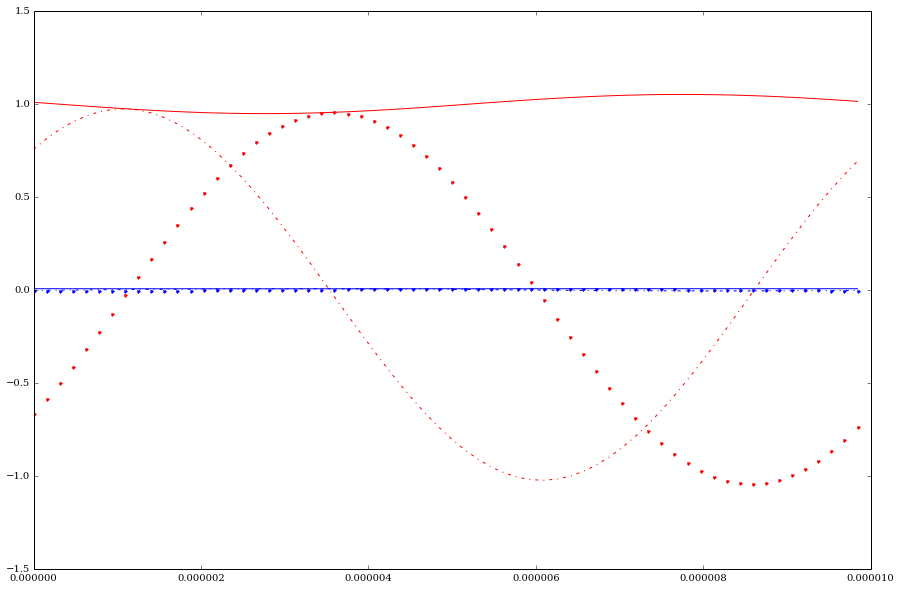

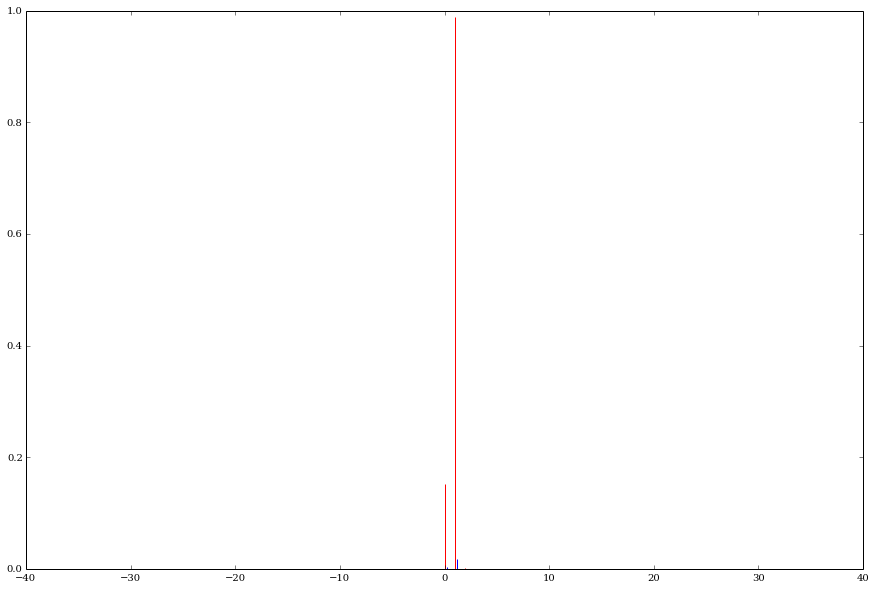

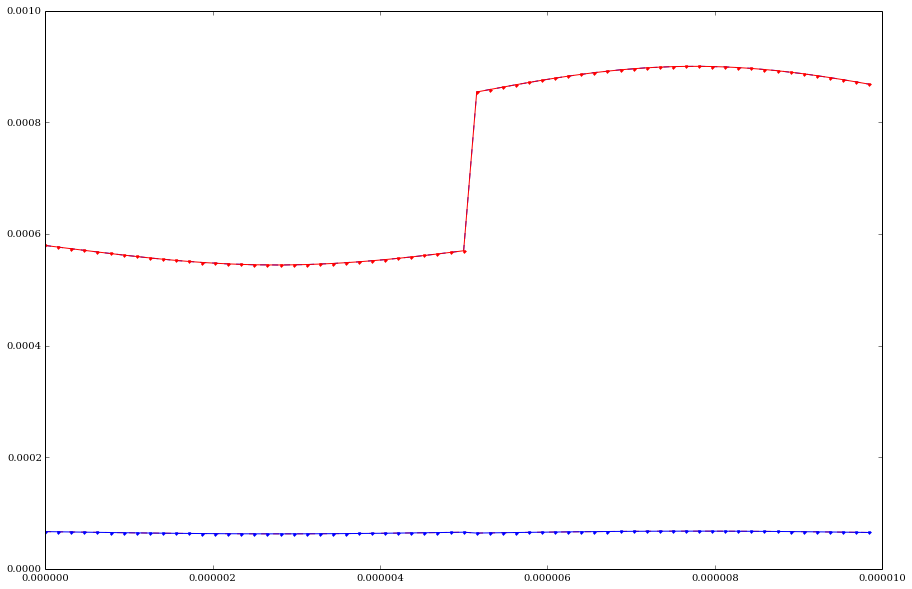

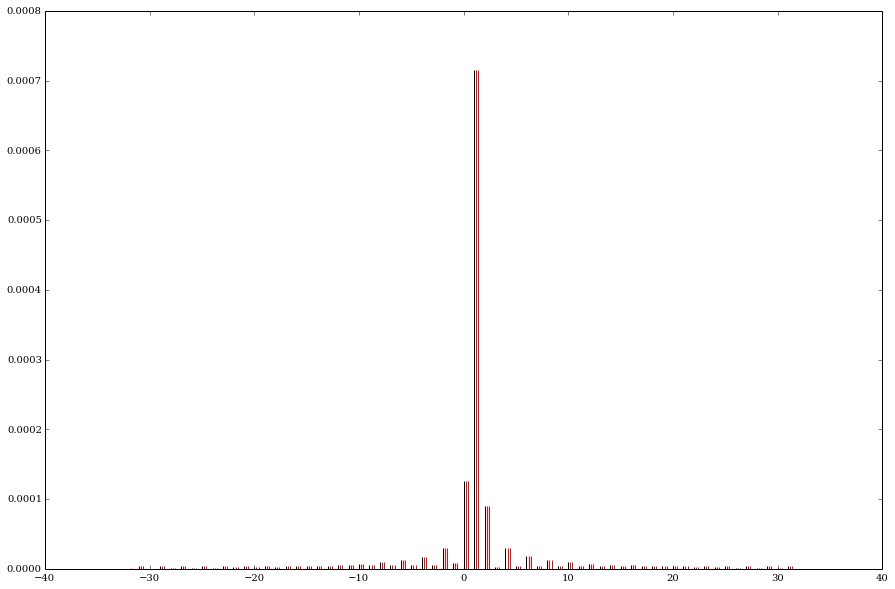

In [352]:
%reload_ext autoreload
%autoreload

%pylab inline
import matplotlib

graph_mp_sym.vbose = False

ind = 50

freqs_list, eigs_list = freq_sweep.getXY()
frequency = freqs_list[ind]
k, alpha = eigs_list[ind]
x_null = np.array([x_null_sweep[ind]]).T

print('n_f:', len(freqs_list),'\nf:', frequency, '\nk:', k, '\nalpha:', alpha, '\nx_null.shape:', x_null.shape)


figsize(15, 10)
Ex_field, Ez_field, z_axis = graph_mp.GetFieldsT_Exz(x_null)

print('z_axis.shape', z_axis.shape)
plot(z_axis, np.abs(Ex_field), 'b', z_axis, np.abs(Ez_field), 'r')
plot(z_axis, np.real(Ex_field), 'b-.', z_axis, np.real(Ez_field), 'r-.')
plot(z_axis, np.imag(Ex_field), 'b.', z_axis, np.imag(Ez_field), 'r.')
show()

Ex_field_inv, Ez_field_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Exz(res[ind_eig][1])
vlines(z_axis, np.zeros(z_axis.shape), np.abs(Ez_field_inv), colors=u'r', linestyles=u'solid', label=u'')
vlines(z_axis+0.2, np.zeros(z_axis.shape), np.abs(Ex_field_inv), colors=u'b', linestyles=u'solid', label=u'')
show()

mode = 'np.abs'
Hx1_field, Hz1_field, Hx2_field, Hz2_field, z_axis = graph_mp.GetFieldsT_Hxz(graph_mp_sym, frequency, k, alpha, x_null)
plot(z_axis, eval(mode)(Hx1_field-Hx2_field), 'b--', z_axis, eval(mode)(Hz1_field-Hz2_field), 'r--')

[Jx, Jz, z_axis] = graph_mp.GetCurrentT_Jxz(frequency, x_null)
plot(z_axis, eval(mode)(Jx), 'b', z_axis, eval(mode)(Jz), 'r')

[Jx, Jz, z_axis] = graph_mp.GetCurrentT_Jxz_Conv(graph_mp_sym, frequency, x_null)
plot(z_axis, eval(mode)(Jx), 'b.', z_axis, eval(mode)(Jz), 'r.')
show()

mode = 'np.abs'
jcomp = 'z'
Hx1_inv, Hz1_inv, Hx2_inv, Hz2_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Hxz(graph_mp_sym, frequency, k, alpha, x_null)
if jcomp=='z':
    vlines(z_axis, np.zeros(z_axis.shape), eval(mode)(Hx1_inv-Hx2_inv), colors=u'k', linestyles=u'solid', label=u'')
    
    Jx_inv, Jz_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Jxz( frequency, x_null)
    
    vlines(z_axis+0.2, np.zeros(z_axis.shape), eval(mode)(Jz_inv), colors=u'r', linestyles=u'solid', label=u'')
    
    J_xyz_inv = graph_mp.GetCurrentHarmonics_Jxyz(graph_mp_sym, frequency, x_null)
    vlines(z_axis+0.4, np.zeros(z_axis.shape), eval(mode)(J_xyz_inv[2,:]), colors=u'r', linestyles=u'solid', label=u'')
else:
    assert jcomp=='x'
    vlines(z_axis, np.zeros(z_axis.shape), eval(mode)(Hz1_inv-Hz2_inv), colors=u'k', linestyles=u'solid', label=u'')
    
    Jx_inv, Jz_inv, z_axis = graph_mp.GetFieldsFourierCoeffsT_Jxz( frequency, x_null)
    
    vlines(z_axis+0.2, np.zeros(z_axis.shape), eval(mode)(Jx_inv), colors=u'r', linestyles=u'solid', label=u'')
    
    J_xyz_inv = graph_mp.GetCurrentHarmonics_Jxyz(graph_mp_sym, frequency, x_null)
    vlines(z_axis+0.4, np.zeros(z_axis.shape), eval(mode)(J_xyz_inv[0,:]), colors=u'r', linestyles=u'solid', label=u'')

show()
